# Контрольная работа
Хункаев Магомед

In [27]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

Выгрузим данные в датафрейм и псомотрим на них

In [9]:
df = pd.read_csv('/Users/kirillmirchevskiy/Downloads/Econometrica-master/python-notebooks/data-csv/12Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df["airconditioning"].unique()

array(['yes', 'no'], dtype=object)

Видим что банарная колонка airconditioning содержит данные в неудобном для применения моделей виде

Заменим yes, no на 1, 0 соответственно

In [13]:
cleanup_nums = {"airconditioning": {"yes": 1, "no": 0}}
df = df.replace(cleanup_nums)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,1,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,1,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,1,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,1,2,no,furnished


Для набора данных '12Housing.csv' рассмотрим регрессию **log(price) на area & airconditioning.**

Спецификация: $\log(price)=\beta_0+\beta_1area+\beta_2airconditioning+u$

Подгоним модель и найдем параметры регрессии

In [18]:
# Подгонка модели
price_eq = smf.ols(formula='np.log(price)~area+airconditioning', data=df).fit()
price_eq.params.round(3)

Intercept          14.807
area                0.000
airconditioning     0.281
dtype: float64

Вычислим основные параметры регрессии: TSS, ESS, RSS

In [19]:
TSS = price_eq.centered_tss
ESS = price_eq.ess
RSS = price_eq.ssr
print("TSS =", TSS.round(3))
print("ESS =", ESS.round(3))
print("RSS =", RSS.round(3))

TSS = 75.348
ESS = 31.097
RSS = 44.251


Вычислим $R^2$ и $R^2_{adj}$

In [22]:
R2 = price_eq.rsquared
R2_adj = price_eq.rsquared_adj
print("R2 =", R2.round(3))
print("R2_adj =", R2_adj.round(3))

R2 = 0.413
R2_adj = 0.411


Вычислим стандартрую ошибку регрессии

In [24]:
n = len(df["price"])
k = 2
s = np.sqrt(RSS / (n - k - 1))
print("s =", s.round(3))

s = 0.286


Спецификация: $\log(price)=14.807+0*area+0.281*airconditioning+u$

### Интерпретация модели
1) При  изменение окруженяи, цена не меняется
2) Наличие кондиционера увеличивает стоимость на 0.281%

Значимые коэффиценты - **airconditioning**

### Построим графики линии тренда для различных наборов значений

График **price~area**

<Axes: xlabel='price', ylabel='area'>

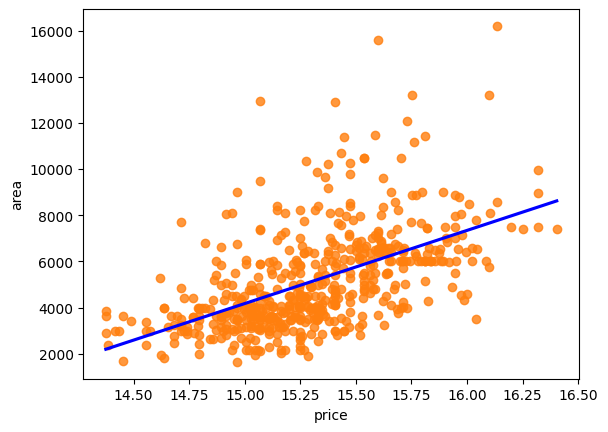

In [35]:
sns.regplot(data=df, x=np.log(df['price']), y='area', ci=None, line_kws={"color": "b"}, color = "C1")

График **price~airconditioning**

<Axes: xlabel='price', ylabel='airconditioning'>

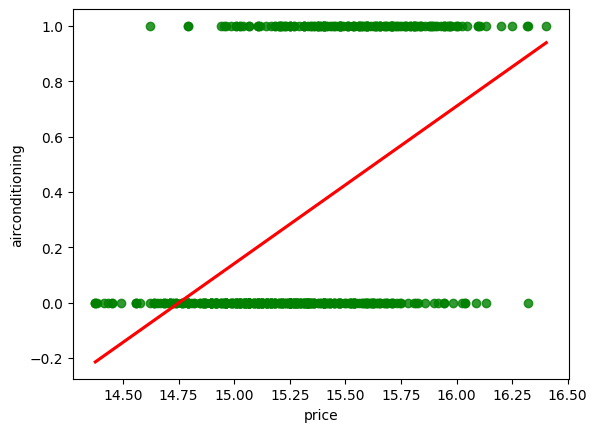

In [30]:
sns.regplot(data=df, x=np.log(df['price']), y='airconditioning', ci=None, line_kws={"color": "r"}, color = "g")

Вывод:

Рассмотрим регрессию без константы

In [32]:
price_eq2 = smf.ols(formula='np.log(price)~-1+area+airconditioning', data=df).fit()
price_eq2.params.round(3)

area               0.002
airconditioning    1.039
dtype: float64

Вычислим $R^2$

In [33]:
R2 = price_eq2.rsquared
print("R2 =", R2.round(3))

R2 = 0.859


Сравним с предыдущем значением $R^2$ = 0.413

В моделе без константы значение получилось больше, следовательно переменная отклика лучше объясняется предикторной переменной